In [1]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

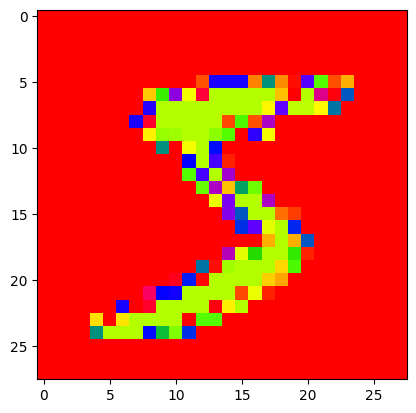

In [10]:
plt.imshow(x_train[0],cmap='prism')

In [11]:
x_train = x_train/255.0

In [13]:
x_test=x_test/255.0

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
    ])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile( optimizer='rmsprop', loss= 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [28]:
h = model.fit(x_train,y_train,epochs=100,batch_size=256)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8400 - loss: 0.5529
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9548 - loss: 0.1580
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9729 - loss: 0.0964
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9805 - loss: 0.0697
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9854 - loss: 0.0522
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9888 - loss: 0.0413
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9914 - loss: 0.0324
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9928 - loss: 0.0267
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9952 - loss: 0.0201
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9968 - loss: 0.0145
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9972 - loss: 0.0135
Epoch 12/100
235/235 ━━━━━━━━━

In [23]:
model.predict(np.expand_dims(x_train[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[1.9452147e-13, 3.7342887e-10, 6.3733596e-09, 1.1106931e-02,
        1.1168738e-18, 9.8889309e-01, 4.1164446e-15, 2.1386867e-10,
        3.0547734e-11, 2.4522797e-09]], dtype=float32)

In [41]:
eval_loss, eval_acc =model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9803 - loss: 0.0928


In [42]:
eval_loss

0.0773986354470253

In [43]:
eval_acc

0.9830999970436096

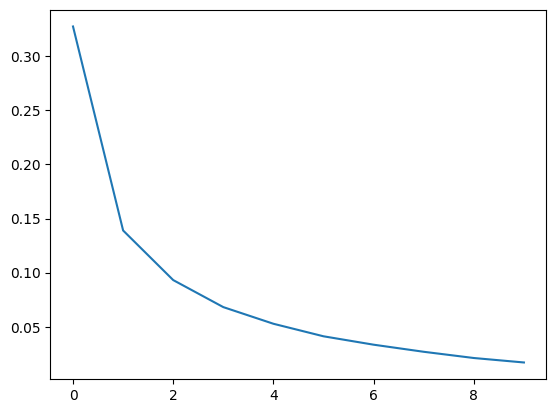

In [27]:
plt.plot(h.history['loss'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7632 - loss: 0.8294
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9310 - loss: 0.2465
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9464 - loss: 0.1860
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9562 - loss: 0.1511
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9614 - loss: 0.1310
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9677 - loss: 0.1086
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9703 - loss: 0.1004
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9740 - loss: 0.0875
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9765 - loss: 0.0803
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9784 - loss: 0.0730
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0882
Test accuracy: 0.9760000109672546


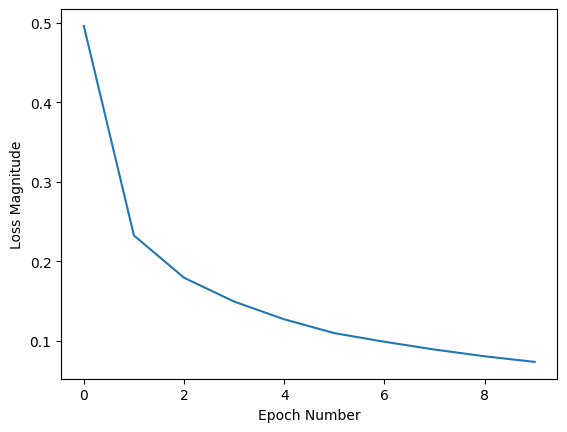

In [32]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.summary()
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

h = model2.fit(x_train, y_train,
               epochs=10,
               batch_size=256)

# Plotting the loss history
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(h.history['loss'])

# Evaluating the model
eval_loss, eval_acc = model2.evaluate(x_test,
                                      y_test)
print('Test accuracy: {}'.format(eval_acc))

In [33]:
img = x_test[0]

In [34]:
img.shape

(28, 28)

In [38]:
img = img.reshape(1, 28, 28)

In [39]:
img.shape

(1, 28, 28)

In [40]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[4.4804092e-14, 1.6961635e-17, 8.6383613e-13, 9.9053243e-10,
        7.9327509e-21, 4.2750690e-16, 5.7342468e-22, 1.0000000e+00,
        1.2830622e-13, 2.4260420e-11]], dtype=float32)